In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Processamento das Categorias

Com o filtro dos alunos e os perfis montados, este notebook tem como objetivo remover alunos que não tiveram presença válida no ENADE, e transformar as variáveis categóricas.

In [4]:
computacaoenade2021 = pd.read_csv('/content/drive/MyDrive/EDM 2025.1/DATASETS/ENADE/2021/computacao_enade_2021.csv', sep=';')
computacaoenade2017 = pd.read_csv('/content/drive/MyDrive/EDM 2025.1/DATASETS/ENADE/2017/computacao_enade_2017.csv', sep=';')
computacaoenade2014 = pd.read_csv('/content/drive/MyDrive/EDM 2025.1/DATASETS/ENADE/2014/computacao_enade_2014.csv', sep=';')

Durante o processamento, não verifiquei desse total de alunos, qual era a quantidade que possuiam resultados válidos, isto é: O atributo **TP_PRES** = 555 (Presente com resultado válido)

## Presença válida

In [5]:
computacaoenade2021.shape

(7564, 28)

In [6]:
computacaoenade2021['TP_PRES'].value_counts()

,count
TP_PRES,
555,5651
222,1882
334,23
444,8


In [7]:
computacaoenade2017.shape

(7129, 28)

In [8]:
computacaoenade2017['TP_PRES'].value_counts()

,count
TP_PRES,
555,5675
222,1446
444,8


In [9]:
computacaoenade2014.shape

(8285, 30)

In [10]:
computacaoenade2014['TP_PRES'].value_counts()

,count
TP_PRES,
555,6669
222,1616


In [11]:
computacaoenade2021 = computacaoenade2021[computacaoenade2021['TP_PRES'] == 555]
computacaoenade2017 = computacaoenade2017[computacaoenade2017['TP_PRES'] == 555]
computacaoenade2014 = computacaoenade2014[computacaoenade2014['TP_PRES'] == 555]

In [12]:
print(computacaoenade2021.shape)
print(computacaoenade2017.shape)
print(computacaoenade2014.shape) #2014 tem dois a mais que são referentes aos turnos.

(5651, 28)
(5675, 28)
(6669, 30)


## Questão de Cursos Integrais no ENADE 2014

O de 2014 possui três colunas para descrever o turno da graduação. Nos ciclos seguintes, todos os turnos foram consolidados em uma única coluna. Então para isso, será necessário fazer uma consolidação.

In [13]:
computacaoenade2014.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'IN_MATUT', 'IN_VESPER', 'IN_NOTURNO',
       'TP_PRES', 'NT_GER', 'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD',
       'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09',
       'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'],
      dtype='object')

In [14]:
computacaoenade2014['IN_MATUT'].value_counts()
# 0: NÃO
# 1: SIM

,count
IN_MATUT,
0.0,4213
1.0,2455


In [15]:
computacaoenade2014['IN_VESPER'].value_counts()
# 0: NÃO
# 1: SIM

,count
IN_VESPER,
0.0,4851
1.0,1817


In [16]:
computacaoenade2014['IN_NOTURNO'].value_counts()
# 0: NÃO
# 1: SIM

,count
IN_NOTURNO,
1.0,4080
0.0,2588


In [17]:
turnos = computacaoenade2014[['IN_MATUT', 'IN_VESPER', 'IN_NOTURNO']]
multiplos_turnos = turnos.sum(axis=1)

quantidade_multiplos = (multiplos_turnos >= 2).sum()
print(f"Linhas com 2 ou mais turnos marcados como 'SIM': {quantidade_multiplos}")

turno_unico = computacaoenade2014[multiplos_turnos == 1]
print(f"Linhas com apenas um turno marcado como 'SIM': {len(turno_unico)}")

Linhas com 2 ou mais turnos marcados como 'SIM': 1382
Linhas com apenas um turno marcado como 'SIM': 5286


In [18]:
cursos_multiplos_turnos = computacaoenade2014[multiplos_turnos >= 2]
cursos_multiplos_turnos[['IN_MATUT', 'IN_VESPER', 'IN_NOTURNO']].head()

,IN_MATUT,IN_VESPER,IN_NOTURNO
56,1.0,1.0,0.0
57,1.0,1.0,0.0
58,1.0,1.0,0.0
59,1.0,1.0,0.0
60,1.0,1.0,0.0


2455+1817+4080 = 8355
Possui 1683 cursos que são do tipo Integral, mas que não estão consolidados aqui de forma eficiente.

In [19]:
computacaoenade2017.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'CO_TURNO_GRADUACAO', 'TP_PRES', 'NT_GER',
       'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'],
      dtype='object')

In [20]:
computacaoenade2017['CO_TURNO_GRADUACAO'].value_counts()
#1 = Matutino
#2 = Vespertino
#3 = Integral
#4 = Noturno

,count
CO_TURNO_GRADUACAO,
4.0,3222
3.0,1090
1.0,958
2.0,402


### Padronização do ENADE 2014 [turnos]

In [21]:
turnos = computacaoenade2014[['IN_MATUT', 'IN_VESPER', 'IN_NOTURNO']]
soma_turnos = turnos.sum(axis=1)

computacaoenade2014['CO_TURNO_GRADUACAO'] = np.nan

computacaoenade2014.loc[soma_turnos >= 2, 'CO_TURNO_GRADUACAO'] = 3 #integral
computacaoenade2014.loc[(computacaoenade2014['IN_MATUT'] == 1) & (soma_turnos == 1), 'CO_TURNO_GRADUACAO'] = 1 #matutino
computacaoenade2014.loc[(computacaoenade2014['IN_VESPER'] == 1) & (soma_turnos == 1), 'CO_TURNO_GRADUACAO'] = 2 #vespertino
computacaoenade2014.loc[(computacaoenade2014['IN_NOTURNO'] == 1) & (soma_turnos == 1), 'CO_TURNO_GRADUACAO'] = 4 #noturno


In [22]:
computacaoenade2014['CO_TURNO_GRADUACAO'].value_counts()
#somou certo, então tá tudo ok

,count
CO_TURNO_GRADUACAO,
4.0,3752
3.0,1382
1.0,1098
2.0,436


In [23]:
computacaoenade2014.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'IN_MATUT', 'IN_VESPER', 'IN_NOTURNO',
       'TP_PRES', 'NT_GER', 'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD',
       'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09',
       'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21',
       'CO_TURNO_GRADUACAO'],
      dtype='object')

In [24]:
computacaoenade2014 = computacaoenade2014.drop(columns=['IN_MATUT', 'IN_VESPER', 'IN_NOTURNO'])

In [25]:
computacaoenade2017.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'CO_TURNO_GRADUACAO', 'TP_PRES', 'NT_GER',
       'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'],
      dtype='object')

In [26]:
colunas_2017 = computacaoenade2017.columns.tolist()
colunas_reordenadas = [col for col in colunas_2017 if col in computacaoenade2014.columns]
computacaoenade2014 = computacaoenade2014[colunas_reordenadas]
computacaoenade2014.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'CO_TURNO_GRADUACAO', 'TP_PRES', 'NT_GER',
       'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'],
      dtype='object')

## Input dos dados ausentes

### 2021

In [27]:
print("Nulos em enade2021:")
print(computacaoenade2021.isnull().sum())

Nulos em enade2021:
NU_ANO                  0
CO_CURSO                0
CO_GRUPO                0
CO_UF_CURSO             0
CO_REGIAO_CURSO         0
CO_CATEGAD              0
CO_ORGACAD              0
CO_TURNO_GRADUACAO      7
TP_PRES                 0
NT_GER                 14
TP_SEXO                 7
NU_IDADE                7
ANO_FIM_EM              7
ANO_IN_GRAD             7
QE_I01                721
QE_I02                676
QE_I03                678
QE_I04                691
QE_I05                677
QE_I08                714
QE_I09                681
QE_I10                698
QE_I11                698
QE_I12                699
QE_I13                693
QE_I15                689
QE_I17                666
QE_I21                682
dtype: int64


In [28]:
valores_ano_fim_em = computacaoenade2021['ANO_FIM_EM'].value_counts().sort_index().reset_index()
valores_ano_fim_em.columns = ['ANO_FIM_EM', 'quantidade']
valores_ano_fim_em

,ANO_FIM_EM,quantidade
0,1905.0,8
1,1972.0,2
2,1978.0,1
3,1986.0,1
4,1987.0,3
5,1988.0,5
6,1989.0,2
7,1990.0,6
8,1991.0,7
9,1992.0,10


In [29]:
valores_ano_in_grad = computacaoenade2021['ANO_IN_GRAD'].value_counts().sort_index().reset_index()
valores_ano_in_grad.columns = ['ANO_IN_GRAD', 'quantidade']
valores_ano_in_grad

,ANO_IN_GRAD,quantidade
0,219.0,2
1,1993.0,1
2,1995.0,1
3,1996.0,1
4,2001.0,1
5,2002.0,1
6,2003.0,2
7,2004.0,6
8,2005.0,8
9,2006.0,7


In [30]:
#1905 é impossível
#219 é impossível também. vamos substituir pela média

### 2017

In [31]:
print("Nulos em enade2017:")
print(computacaoenade2017.isnull().sum())

Nulos em enade2017:
NU_ANO                  0
CO_CURSO                0
CO_GRUPO                0
CO_UF_CURSO             0
CO_REGIAO_CURSO         0
CO_CATEGAD              0
CO_ORGACAD              0
CO_TURNO_GRADUACAO      3
TP_PRES                 0
NT_GER                  5
TP_SEXO                 3
NU_IDADE                3
ANO_FIM_EM              3
ANO_IN_GRAD             3
QE_I01                695
QE_I02                712
QE_I03                685
QE_I04                714
QE_I05                691
QE_I08                706
QE_I09                717
QE_I10                687
QE_I11                715
QE_I12                705
QE_I13                681
QE_I15                685
QE_I17                683
QE_I21                688
dtype: int64


### 2014

In [32]:
print("Nulos em enade2014:")
print(computacaoenade2014.isnull().sum())

Nulos em enade2014:
NU_ANO                  0
CO_CURSO                0
CO_GRUPO                0
CO_UF_CURSO             0
CO_REGIAO_CURSO         0
CO_CATEGAD              0
CO_ORGACAD              0
CO_TURNO_GRADUACAO      1
TP_PRES                 0
NT_GER                  4
TP_SEXO                 1
NU_IDADE                1
ANO_FIM_EM              1
ANO_IN_GRAD             1
QE_I01                714
QE_I02                686
QE_I03                676
QE_I04                693
QE_I05                686
QE_I08                690
QE_I09                690
QE_I10                683
QE_I11                687
QE_I12                688
QE_I13                722
QE_I15                696
QE_I17                664
QE_I21                697
dtype: int64


## Seleção de atributos para normalização (relevantes).



*   **NU_ANO**: só informa o ano da edição;
*   **CO_CURSO**: não traz informação semântica
*   **CO_GRUPO**
*   **CO_UF_CURSO**: utilizar pra explicar os cluters







---



Para algumas variáveis, vou fazer um mapeamento para reduzir a granularidade.

QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'

In [33]:
co_categad_dict = {
    1 : 'Pública',
    2 : 'Pública',
    3 : 'Pública',
    4 : 'Privada',
    5 : 'Privada',
    7 : 'Pública'
}

ufs_dict = {
    21 : 'MA',
    22 : 'PI',23 : 'CE',
    24 : 'RN',25 : 'PB',
    26 : 'PE',27 : 'AL',
    28 : 'SE',29 : 'BA'
}

q1_estado_civil_dict = {
    'A': 'Solteiro',
    'B': 'Casado',
    'C': 'Separado',
    'D': 'Viúvo',
    'E': 'Outro'
}

q2_raca_dict = {
    'A' : 'Branca',
    'B' : 'Preta',
    'C' : 'Amarela',
    'D' : 'Parda',
    'E': 'Indígena',
    'F': 'Não declarado'
}

q3_nacio_dict = {
    'A' : 'Brasileira',
    'B' : 'Brasileira naturalizada',
    'C' : 'Estrangeira'
}

q4_q5_escolaridade_pais_dict = {
    'A' : 'Nenhuma',
    'B' : 'Fundamental I',
    'C' : 'Fundamental II',
    'D' : 'Ensino Médio',
    'E': 'Superior',
    'F': 'Pós-graduação'
}

q8_renda_total_dict = {
    'A' : '1.5 SM',
    'B' : '1.5 a 3 SM',
    'C' : '3 a 4.5 SM',
    'D' : '4.5 a 6 SM',
    'E': '6 a 10 SM',
    'F': '10 a 30 SM',
    'G': 'Acima de 30 SM'
}

q9_situacao_financeira_dict = {
    'A' : 'Sem renda/Outros',
    'B' : 'Sem renda/Outros',
    'C' : 'Possui renda/Outros',
    'D' : 'Possui renda',
    'E': 'Possui renda/Sustento',
    'F': 'Possui renda/principal'
}

q10_situacao_trab_dict = {
    'A' : 'Não trabalha',
    'B' : 'Trabalha eventualmente',
    'C' : 'Trabalho até 20h semanais',
    'D' : 'Trabalho 21h/39h semanais',
    'E': 'Trabalho 40h +'
}

q11_bolsa_dict = {
    'A' : 'Não se aplica','B' : 'Não',
    'C' : 'Sim', 'D' : 'Sim',
    'E': 'Sim', 'F' : 'Sim',
    'G' : 'Sim', 'H' : 'Sim',
    'I': 'Sim', 'J' : 'Sim',
    'K' : 'Sim'
}

q12_auxilo_dict = {
    'A' : 'Nenhum',
    'B' : 'Moradia',
    'C' : 'Alimentação',
    'D' : 'Moradia e Alimentação',
    'E': 'Permanência',
    'F' : 'Outro'
}

q14_bolsa_acad_dict = {
    'A' : 'Nenhum',
    'B' : 'IC',
    'C' : 'Extensão',
    'D' : 'Monitoria/Tutoria',
    'E': 'PET',
    'F' : 'Outro'
}

q15_af_dict = {
    'A' : 'Não',
    'B' : 'IC',
    'C' : 'Extensão',
    'D' : 'Monitoria/Tutoria',
    'E': 'PET',
    'F' : 'Outro'
}
17,21

q17_escola_em_dict = {
    'A' : 'Pública',
    'B' : 'Privada',
    'C' : 'Exterior',
    'D' : 'Pública',
    'E': 'Privada',
    'F' : 'Exterior'
}

q21_escola_em_dict = {
    'A' : 'Sim',
    'B' : 'Não'
}

grupo_siglas_dict = {
    72: 'ADS',       # Análise e Desenvolvimento de Sistemas
    79: 'RC',        # Redes de Computadores
    4004: 'CC',      # Ciência da Computação
    4005: 'LBCC',    # Ciência da Computação (Licenciatura)
    4006: 'BSI',     # Sistemas de Informação
    6409: 'GTI',     # Gestão da Tecnologia da Informação
    5809: 'EC'       # Engenharia de Computação
}


In [34]:
mapeamentos_qe = {
    'QE_I01': q1_estado_civil_dict,
    'QE_I02': q2_raca_dict,
    'QE_I03': q3_nacio_dict,
    'QE_I04': q4_q5_escolaridade_pais_dict,
    'QE_I05': q4_q5_escolaridade_pais_dict,
    'QE_I08': q8_renda_total_dict,
    'QE_I09': q9_situacao_financeira_dict,
    'QE_I10': q10_situacao_trab_dict,
    'QE_I11': q11_bolsa_dict,
    'QE_I12': q12_auxilo_dict,
    'QE_I13': q14_bolsa_acad_dict,
    'QE_I15': q15_af_dict,
    'QE_I17': q17_escola_em_dict,
    'QE_I21': q21_escola_em_dict,
    'CO_UF_CURSO': ufs_dict,
    'CO_CATEGAD': co_categad_dict
}

nomes_colunas_legiveis = {
    'NU_ANO': 'ano',
    'CO_CURSO': 'curso',
    'CO_GRUPO': 'grupo',
    'CO_UF_CURSO': 'uf',
    'CO_CATEGAD': 'categoria_administrativa',
    'CO_ORGACAD': 'organizacao_academica',
    'CO_TURNO_GRADUACAO': 'turno_graduacao',
    'TP_PRES': 'tipo_presenca',
    'NT_GER': 'nota_geral',
    'TP_SEXO': 'sexo',
    'NU_IDADE': 'idade',
    'CO_REGIAO_CURSO': 'regiao',
    'QE_I01': 'estado_civil',
    'QE_I02': 'raca_cor',
    'QE_I03': 'nacionalidade',
    'QE_I04': 'escolaridade_pai',
    'QE_I05': 'escolaridade_mae',
    'QE_I08': 'renda_familiar',
    'QE_I09': 'situacao_financeira',
    'QE_I10': 'situacao_trabalho',
    'QE_I11': 'tipo_bolsa',
    'QE_I12': 'tipo_auxilio',
    'QE_I13': 'bolsa_academica',
    'QE_I15': 'atividade_af',
    'QE_I17': 'escola_ensino_medio',
    'QE_I21': 'escola_fundamental'
}

def tratar_nulos_por_frequencia(df, colunas):
    for col in colunas:
        if col in df.columns:
            moda = df[col].mode(dropna=True)
            if not moda.empty:
                df[col] = df[col].fillna(moda[0])
    return df

def tratar_nulos_por_frequencia(df, colunas):
    for col in colunas:
        if col in df.columns:
            moda = df[col].mode(dropna=True)
            if not moda.empty:
                df[col] = df[col].fillna(moda[0])
    return df

def preprocessar_enade(df):
    for coluna, mapa in mapeamentos_qe.items():
        if coluna in df.columns:
            df[coluna] = df[coluna].map(mapa)

    df = df.rename(columns=nomes_colunas_legiveis)

    if 'grupo' in df.columns:
        df['grupo'] = df['grupo'].map(grupo_siglas_dict)

    colunas_qe_legiveis = list(nomes_colunas_legiveis.values())
    df = tratar_nulos_por_frequencia(df, colunas_qe_legiveis)

    return df

In [35]:
dados_14 = preprocessar_enade(computacaoenade2014)
dados_17 = preprocessar_enade(computacaoenade2017)
dados_21 = preprocessar_enade(computacaoenade2021)

In [168]:
dados_14 = dados_14.dropna()
dados_17 = dados_17.dropna()
dados_21 = dados_21.dropna()

In [37]:
dados_14.columns

Index(['ano', 'curso', 'grupo', 'uf', 'regiao', 'categoria_administrativa',
       'organizacao_academica', 'turno_graduacao', 'tipo_presenca',
       'nota_geral', 'sexo', 'idade', 'ANO_FIM_EM', 'ANO_IN_GRAD',
       'estado_civil', 'raca_cor', 'nacionalidade', 'escolaridade_pai',
       'escolaridade_mae', 'renda_familiar', 'situacao_financeira',
       'situacao_trabalho', 'tipo_bolsa', 'tipo_auxilio', 'bolsa_academica',
       'atividade_af', 'escola_ensino_medio', 'escola_fundamental'],
      dtype='object')

In [38]:
dados_14.head()

,ano,curso,grupo,uf,regiao,categoria_administrativa,organizacao_academica,turno_graduacao,tipo_presenca,nota_geral,...,escolaridade_mae,renda_familiar,situacao_financeira,situacao_trabalho,tipo_bolsa,tipo_auxilio,bolsa_academica,atividade_af,escola_ensino_medio,escola_fundamental
0,2014,317,CC,SE,2,Pública,10028,2.0,555,56.4,...,Fundamental II,4.5 a 6 SM,Possui renda/Sustento,Trabalho 40h +,Não se aplica,Nenhum,Nenhum,Não,Pública,Sim
1,2014,317,CC,SE,2,Pública,10028,2.0,555,81.1,...,Fundamental II,4.5 a 6 SM,Possui renda/Sustento,Trabalho 40h +,Não se aplica,Nenhum,Outro,Não,Pública,Sim
2,2014,317,CC,SE,2,Pública,10028,2.0,555,32.6,...,Ensino Médio,10 a 30 SM,Sem renda/Outros,Trabalho 40h +,Não se aplica,Nenhum,Nenhum,Não,Pública,Sim
3,2014,317,CC,SE,2,Pública,10028,2.0,555,52.6,...,Ensino Médio,6 a 10 SM,Possui renda,Trabalha eventualmente,Não se aplica,Nenhum,Nenhum,Não,Pública,Sim
4,2014,317,CC,SE,2,Pública,10028,2.0,555,58.0,...,Pós-graduação,1.5 a 3 SM,Sem renda/Outros,Trabalho 40h +,Não se aplica,Nenhum,IC,Não,Pública,Sim


In [39]:
enade_mapeado = pd.concat([dados_14, dados_17, dados_21], ignore_index=True)
enade_mapeado.tail()

,ano,curso,grupo,uf,regiao,categoria_administrativa,organizacao_academica,turno_graduacao,tipo_presenca,nota_geral,...,escolaridade_mae,renda_familiar,situacao_financeira,situacao_trabalho,tipo_bolsa,tipo_auxilio,bolsa_academica,atividade_af,escola_ensino_medio,escola_fundamental
17990,2021,5001459,ADS,PE,2,Privada,10022,4.0,555,31.8,...,Ensino Médio,3 a 4.5 SM,Possui renda/Outros,Não trabalha,Não,Nenhum,Nenhum,Não,Pública,Sim
17991,2021,5001459,ADS,PE,2,Privada,10022,4.0,555,28.6,...,Ensino Médio,10 a 30 SM,Possui renda/Outros,Não trabalha,Não,Nenhum,Nenhum,Não,Privada,Não
17992,2021,5001459,ADS,PE,2,Privada,10022,4.0,555,12.7,...,Ensino Médio,1.5 SM,Possui renda/Outros,Trabalho 40h +,Sim,Nenhum,Outro,Não,Privada,Não
17993,2021,5001459,ADS,PE,2,Privada,10022,4.0,555,25.4,...,Ensino Médio,3 a 4.5 SM,Possui renda/Outros,Não trabalha,Sim,Nenhum,Nenhum,Não,Pública,Sim
17994,2021,5001459,ADS,PE,2,Privada,10022,4.0,555,23.9,...,Nenhuma,1.5 SM,Sem renda/Outros,Trabalho 40h +,Sim,Nenhum,Nenhum,Não,Privada,Sim


In [40]:
enade_mapeado.to_csv("enade_mapeado.csv", index=False)

In [41]:
print(enade_mapeado.isnull().sum())

ano                          0
curso                        0
grupo                        0
uf                           0
regiao                       0
categoria_administrativa     0
organizacao_academica        0
turno_graduacao              0
tipo_presenca                0
nota_geral                   0
sexo                         0
idade                        0
ANO_FIM_EM                  11
ANO_IN_GRAD                 11
estado_civil                 0
raca_cor                     0
nacionalidade                0
escolaridade_pai             0
escolaridade_mae             0
renda_familiar               0
situacao_financeira          0
situacao_trabalho            0
tipo_bolsa                   0
tipo_auxilio                 0
bolsa_academica              0
atividade_af                 0
escola_ensino_medio          0
escola_fundamental           0
dtype: int64


In [42]:
enade_mapeado = enade_mapeado.dropna()

### One-Hot Encoding, Normalização e WCSS com Método do Cotovelo

In [43]:
def gerar_datasets_completos(enade_mapeado):
    df_base = enade_mapeado.copy()
    df_normalizado = df_base.copy()
    df_normalizado['sexo'] = df_normalizado['sexo'].map({'M': 0, 'F': 1})

    colunas_zscore = ['nota_geral', 'idade']
    scaler = StandardScaler()
    df_normalizado[colunas_zscore] = scaler.fit_transform(df_normalizado[colunas_zscore])

    colunas_excluir = colunas_zscore + ['sexo']
    colunas_categoricas = [col for col in df_normalizado.columns if col not in colunas_excluir]

    df_dummies = pd.get_dummies(df_normalizado[colunas_categoricas], drop_first=False)
    df_dummies = df_dummies.astype(int)  # Só dummies em int

    df_normalizado_final = pd.concat([df_dummies, df_normalizado[['nota_geral', 'idade', 'sexo']]], axis=1)
    df_normalizado_final = df_normalizado_final[df_dummies.columns.tolist() + ['nota_geral', 'idade', 'sexo']]

    # Dataset 2: One-hot encoding com dados não normalizados
    df_onehot = df_base.copy()
    df_onehot_dummies = pd.get_dummies(df_onehot.drop(columns=['nota_geral']), drop_first=False)
    df_onehot_final = pd.concat([df_onehot_dummies, df_base[['nota_geral']]], axis=1)
    df_onehot_final[df_onehot_dummies.columns] = df_onehot_final[df_onehot_dummies.columns].astype(int)

    return df_normalizado_final, df_onehot_final

enade_normalizado, enade_onehot = gerar_datasets_completos(enade_mapeado)

In [44]:
enade_normalizado

,ano,curso,regiao,organizacao_academica,turno_graduacao,tipo_presenca,ANO_FIM_EM,ANO_IN_GRAD,grupo_ADS,grupo_BSI,...,atividade_af_Outro,atividade_af_PET,escola_ensino_medio_Exterior,escola_ensino_medio_Privada,escola_ensino_medio_Pública,escola_fundamental_Não,escola_fundamental_Sim,nota_geral,idade,sexo
0,2014,317,2,10028,2,555,2008,2009,0,0,...,0,0,0,0,1,0,1,1.094498,-0.542653,0
1,2014,317,2,10028,2,555,2002,2008,0,0,...,0,0,0,0,1,0,1,2.882863,-0.706501,0
2,2014,317,2,10028,2,555,2009,2010,0,0,...,0,0,0,0,1,0,1,-0.628704,-0.542653,0
3,2014,317,2,10028,2,555,2010,2011,0,0,...,0,0,0,0,1,0,1,0.819365,-0.870348,0
4,2014,317,2,10028,2,555,2007,2009,0,0,...,0,0,0,0,1,0,1,1.210343,0.112736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17990,2021,5001459,2,10022,4,555,2018,2019,1,0,...,0,0,0,0,1,0,1,-0.686627,-1.034195,0
17991,2021,5001459,2,10022,4,555,2008,2020,1,0,...,0,0,0,1,0,1,0,-0.918318,-1.034195,0
17992,2021,5001459,2,10022,4,555,2017,2019,1,0,...,0,0,0,1,0,1,0,-2.069533,-0.214959,1
17993,2021,5001459,2,10022,4,555,2012,2020,1,0,...,0,0,0,0,1,0,1,-1.150009,-0.214959,1


In [45]:
enade_normalizado.columns

Index(['ano', 'curso', 'regiao', 'organizacao_academica', 'turno_graduacao',
       'tipo_presenca', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'grupo_ADS', 'grupo_BSI',
       'grupo_CC', 'grupo_EC', 'grupo_LBCC', 'grupo_RC', 'uf_AL', 'uf_BA',
       'uf_CE', 'uf_MA', 'uf_PB', 'uf_PE', 'uf_PI', 'uf_RN', 'uf_SE',
       'categoria_administrativa_Privada', 'categoria_administrativa_Pública',
       'estado_civil_Casado', 'estado_civil_Outro', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_Viúvo', 'raca_cor_Amarela',
       'raca_cor_Branca', 'raca_cor_Indígena', 'raca_cor_Não declarado',
       'raca_cor_Parda', 'raca_cor_Preta', 'nacionalidade_Brasileira',
       'nacionalidade_Brasileira naturalizada', 'nacionalidade_Estrangeira',
       'escolaridade_pai_Ensino Médio', 'escolaridade_pai_Fundamental I',
       'escolaridade_pai_Fundamental II', 'escolaridade_pai_Nenhuma',
       'escolaridade_pai_Pós-graduação', 'escolaridade_pai_Superior',
       'escolaridade_mae_Ensino Mé

In [46]:
enade_onehot

,ano,curso,regiao,organizacao_academica,turno_graduacao,tipo_presenca,idade,ANO_FIM_EM,ANO_IN_GRAD,grupo_ADS,...,atividade_af_Monitoria/Tutoria,atividade_af_Não,atividade_af_Outro,atividade_af_PET,escola_ensino_medio_Exterior,escola_ensino_medio_Privada,escola_ensino_medio_Pública,escola_fundamental_Não,escola_fundamental_Sim,nota_geral
0,2014,317,2,10028,2,555,24,2008,2009,0,...,0,1,0,0,0,0,1,0,1,56.4
1,2014,317,2,10028,2,555,23,2002,2008,0,...,0,1,0,0,0,0,1,0,1,81.1
2,2014,317,2,10028,2,555,24,2009,2010,0,...,0,1,0,0,0,0,1,0,1,32.6
3,2014,317,2,10028,2,555,22,2010,2011,0,...,0,1,0,0,0,0,1,0,1,52.6
4,2014,317,2,10028,2,555,28,2007,2009,0,...,0,1,0,0,0,0,1,0,1,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17990,2021,5001459,2,10022,4,555,21,2018,2019,1,...,0,1,0,0,0,0,1,0,1,31.8
17991,2021,5001459,2,10022,4,555,21,2008,2020,1,...,0,1,0,0,0,1,0,1,0,28.6
17992,2021,5001459,2,10022,4,555,26,2017,2019,1,...,0,1,0,0,0,1,0,1,0,12.7
17993,2021,5001459,2,10022,4,555,26,2012,2020,1,...,0,1,0,0,0,0,1,0,1,25.4


In [47]:
enade_normalizado.to_csv("enade_normalizado.csv", index=False)
enade_onehot.to_csv("enade_nao_normalizado.csv", index=False)

#### Plotando quantidade ideal de Clusters

In [48]:
def calcular_sse_normalizado(df_cluster, k_max=10, seed=42):
    sse = []
    for k in range(1, k_max + 1):
        modelo = KMeans(n_clusters=k, random_state=seed, n_init=10)
        modelo.fit(df_cluster)
        sse.append(modelo.inertia_)
    return [val / sse[0] for val in sse]  # normalizado pela inércia do k=1

## Processamento dos anos e plots comparativos

In [90]:
enade_normalizado.columns

Index(['ano', 'curso', 'regiao', 'organizacao_academica', 'turno_graduacao',
       'tipo_presenca', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'grupo_ADS', 'grupo_BSI',
       'grupo_CC', 'grupo_EC', 'grupo_LBCC', 'grupo_RC', 'uf_AL', 'uf_BA',
       'uf_CE', 'uf_MA', 'uf_PB', 'uf_PE', 'uf_PI', 'uf_RN', 'uf_SE',
       'categoria_administrativa_Privada', 'categoria_administrativa_Pública',
       'estado_civil_Casado', 'estado_civil_Outro', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_Viúvo', 'raca_cor_Amarela',
       'raca_cor_Branca', 'raca_cor_Indígena', 'raca_cor_Não declarado',
       'raca_cor_Parda', 'raca_cor_Preta', 'nacionalidade_Brasileira',
       'nacionalidade_Brasileira naturalizada', 'nacionalidade_Estrangeira',
       'escolaridade_pai_Ensino Médio', 'escolaridade_pai_Fundamental I',
       'escolaridade_pai_Fundamental II', 'escolaridade_pai_Nenhuma',
       'escolaridade_pai_Pós-graduação', 'escolaridade_pai_Superior',
       'escolaridade_mae_Ensino Mé

In [71]:
colunas_socioecon = [
    'organizacao_academica', 'turno_graduacao',
      'ANO_FIM_EM', 'ANO_IN_GRAD', 'grupo_ADS', 'grupo_BSI',
       'grupo_CC', 'grupo_EC', 'grupo_LBCC', 'grupo_RC', 'uf_AL', 'uf_BA',
       'uf_CE', 'uf_MA', 'uf_PB', 'uf_PE', 'uf_PI', 'uf_RN', 'uf_SE',
       'categoria_administrativa_Privada', 'categoria_administrativa_Pública',
       'estado_civil_Casado', 'estado_civil_Outro', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_Viúvo', 'raca_cor_Amarela',
       'raca_cor_Branca', 'raca_cor_Indígena', 'raca_cor_Não declarado',
       'raca_cor_Parda', 'raca_cor_Preta', 'nacionalidade_Brasileira',
       'nacionalidade_Brasileira naturalizada', 'nacionalidade_Estrangeira',
       'escolaridade_pai_Ensino Médio', 'escolaridade_pai_Fundamental I',
       'escolaridade_pai_Fundamental II', 'escolaridade_pai_Nenhuma',
       'escolaridade_pai_Pós-graduação', 'escolaridade_pai_Superior',
       'escolaridade_mae_Ensino Médio', 'escolaridade_mae_Fundamental I',
       'escolaridade_mae_Fundamental II', 'escolaridade_mae_Nenhuma',
       'escolaridade_mae_Pós-graduação', 'escolaridade_mae_Superior',
       'renda_familiar_1.5 SM', 'renda_familiar_1.5 a 3 SM',
       'renda_familiar_10 a 30 SM', 'renda_familiar_3 a 4.5 SM',
       'renda_familiar_4.5 a 6 SM', 'renda_familiar_6 a 10 SM',
       'renda_familiar_Acima de 30 SM', 'situacao_financeira_Possui renda',
       'situacao_financeira_Possui renda/Outros',
       'situacao_financeira_Possui renda/Sustento',
       'situacao_financeira_Possui renda/principal',
       'situacao_financeira_Sem renda/Outros',
       'situacao_trabalho_Não trabalha',
       'situacao_trabalho_Trabalha eventualmente',
       'situacao_trabalho_Trabalho 21h/39h semanais',
       'situacao_trabalho_Trabalho 40h +',
       'situacao_trabalho_Trabalho até 20h semanais', 'tipo_bolsa_Não',
       'tipo_bolsa_Não se aplica', 'tipo_bolsa_Sim',
       'tipo_auxilio_Alimentação', 'tipo_auxilio_Moradia',
       'tipo_auxilio_Moradia e Alimentação', 'tipo_auxilio_Nenhum',
       'tipo_auxilio_Outro', 'tipo_auxilio_Permanência',
       'bolsa_academica_Extensão', 'bolsa_academica_IC',
       'bolsa_academica_Monitoria/Tutoria', 'bolsa_academica_Nenhum',
       'bolsa_academica_Outro', 'bolsa_academica_PET', 'atividade_af_Extensão',
       'atividade_af_IC', 'atividade_af_Monitoria/Tutoria', 'atividade_af_Não',
       'atividade_af_Outro', 'atividade_af_PET',
       'escola_ensino_medio_Exterior', 'escola_ensino_medio_Privada',
       'escola_ensino_medio_Pública', 'escola_fundamental_Não',
       'escola_fundamental_Sim', 'idade', 'sexo', 'nota_geral'
]

def plotar_cotovelo_individual_unico(ano, sse):
    k_vals = np.arange(1, len(sse) + 1)
    plt.figure(figsize=(6, 5))
    plt.plot(k_vals, sse, marker='o')
    plt.title(f'Método do Cotovelo – {ano}')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('SSE Normalizado')
    plt.grid(True)
    plt.show()

"'\ndef plotar_cotovelo_individual_enfileirado(sse_por_ano):\n    k_vals = np.arange(1, 11)\n    fig, axs = plt.subplots(1, len(sse_por_ano), figsize=(6 * len(sse_por_ano), 5), sharey=True)\n\n    if len(sse_por_ano) == 1:\n        axs = [axs]\n\n    for ax, (ano, sse) in zip(axs, sse_por_ano.items()):\n        ax.plot(k_vals, sse, marker='o')\n        ax.set_title(f'Cotovelo – {ano}')\n        ax.set_xlabel('k')\n        ax.set_ylabel('SSE Normalizado')\n        ax.grid(True)\n    \n    plt.tight_layout()\n    plt.show()\n"

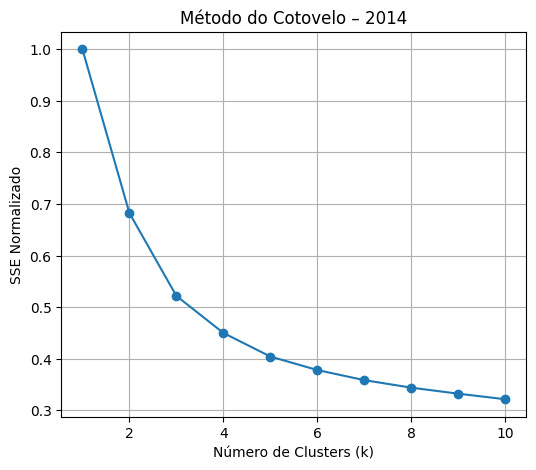

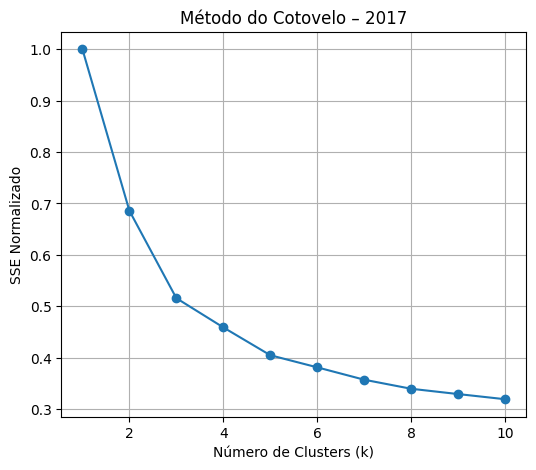

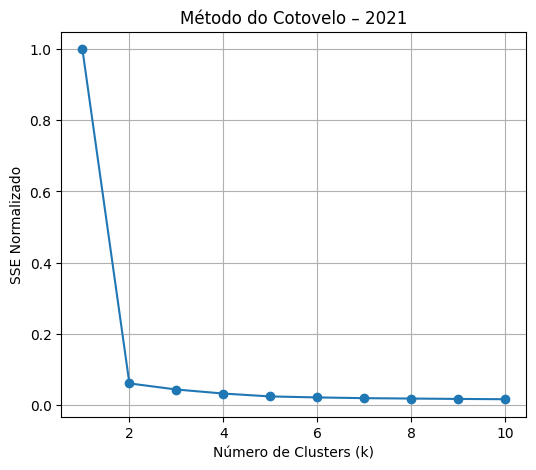

In [82]:
sse_por_ano = {}

# Processamento separado por ano
for ano in [2014, 2017, 2021]:
    df_ano = enade_normalizado[enade_normalizado['ano'] == ano]
    df_cluster = df_ano[colunas_socioecon]

    sse = calcular_sse_normalizado(df_cluster)
    sse_por_ano[ano] = sse

    # Plot individual e isolado
    plotar_cotovelo_individual_unico(ano, sse)

# Plot enfileirado dos 3 anos
#plotar_cotovelo_individual_enfileirado(sse_por_ano)

In [77]:
def plotar_cotovelo_individual_enfileirado(sse_por_ano):
    k_vals = np.arange(1, 11)
    fig, axs = plt.subplots(1, len(sse_por_ano), figsize=(6 * len(sse_por_ano), 5), sharey=True)

    if len(sse_por_ano) == 1:
        axs = [axs]

    for ax, (ano, sse) in zip(axs, sse_por_ano.items()):
        ax.plot(k_vals, sse, marker='o')
        ax.set_title(f'Método do Cotovelo – {ano}')
        ax.set_xlabel('Número de Clusters (k)')
        ax.set_ylabel('SSE Normalizado')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

def plotar_cotovelo_comparativo_barras(sse_por_ano):
    k_vals = np.arange(1, 11)
    deslocamentos = np.linspace(-0.25, 0.25, len(sse_por_ano))

    plt.figure(figsize=(12, 6))
    for (ano, sse), desloc in zip(sse_por_ano.items(), deslocamentos):
        plt.bar(k_vals + desloc, sse, width=0.25, label=str(ano))

    media = np.mean(list(sse_por_ano.values()), axis=0)
    plt.plot(k_vals, media, marker='o', color='black', label='Média')
    plt.title('Método do Cotovelo – SSE Normalizado (Comparativo)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('SSE Normalizado')
    plt.xticks(k_vals)
    plt.grid(False)
    plt.legend()
    plt.tight_layout()
    plt.show()

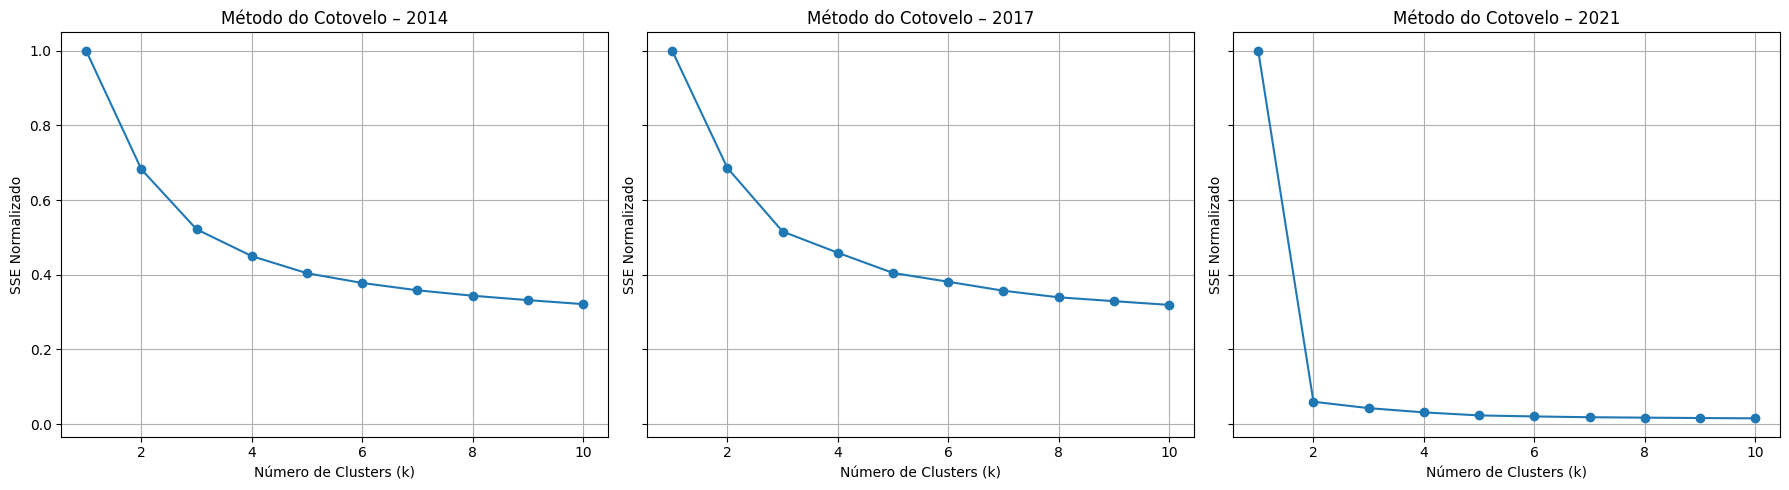

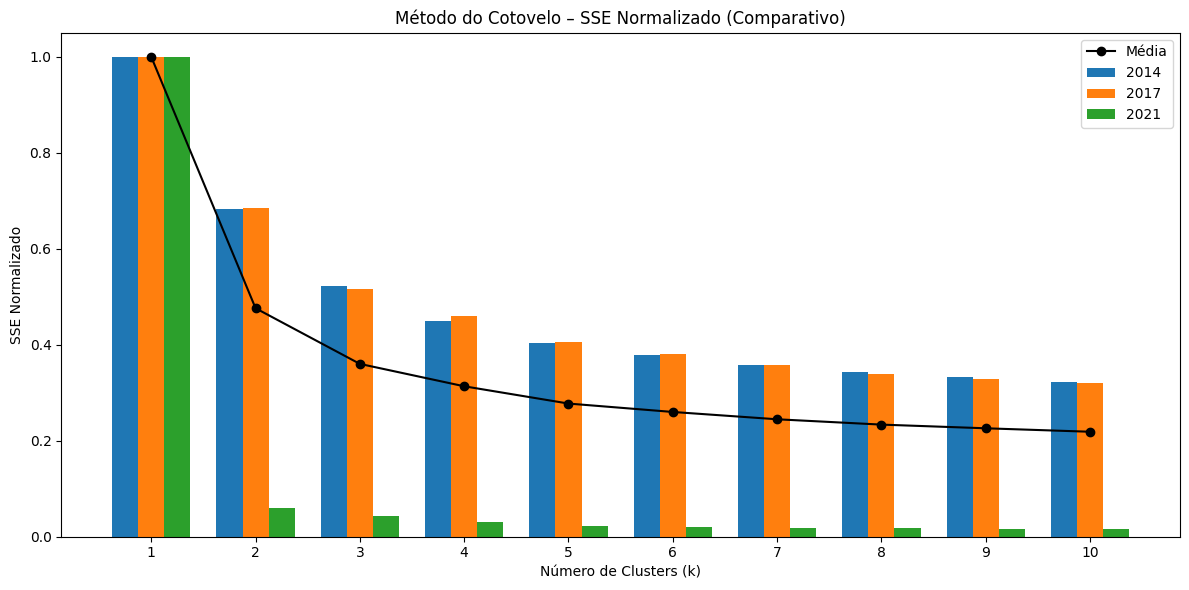

In [78]:
plotar_cotovelo_individual_enfileirado(sse_por_ano)
plotar_cotovelo_comparativo_barras(sse_por_ano)